In [2]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# Import data

from pathlib import Path
cwd = Path.cwd()
datapath = (cwd.parent / 'data/').resolve()

df = pd.read_csv(datapath / 'RecessionTimingRawData2024.csv')

In [4]:
# Set up columns

for i in (3,6,12):
    for var in ("ur",):
        df["s"+str(i)+"_"+var] = df[var].diff(i)
    for var in ('emp','sp500','ip'):
        df["s"+str(i)+"_ln"+var] = np.log(df[var]).diff(i)
df["rbaar10yr"] = df.rbaa - df.r10yr
df["r10yrr3yr"] = df.r10yr - df.r3yr
        
df.head(12)

,period,r10yr,rff,rbaa,r3mo,r1yr,r3yr,r5yr,rec,rec12mo,...,s3_lnemp,s3_lnsp500,s3_lnip,s6_ur,s12_ur,s12_lnemp,s12_lnsp500,s12_lnip,rbaar10yr,r10yrr3yr
0,4/1/1953,2.83,NaN,3.65,2.19,2.36,2.51,2.62,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,0.32
1,5/1/1953,3.05,NaN,3.78,2.16,2.48,2.72,2.87,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.33
2,6/1/1953,3.11,NaN,3.86,2.11,2.45,2.74,2.94,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.37
3,7/1/1953,2.93,NaN,3.86,2.04,2.38,2.62,2.75,0.0,1.0,...,0.002001,-0.017143,0.013677,NaN,NaN,NaN,NaN,NaN,0.93,0.31
4,8/1/1953,2.95,NaN,3.85,2.04,2.28,2.58,2.80,1.0,1.0,...,-0.000020,-0.018282,0.002737,NaN,NaN,NaN,NaN,NaN,0.90,0.37
5,9/1/1953,2.87,NaN,3.88,1.79,2.20,2.56,2.71,1.0,1.0,...,-0.002993,-0.028803,-0.013847,NaN,NaN,NaN,NaN,NaN,1.01,0.31
6,10/1/1953,2.66,NaN,3.82,1.38,1.79,2.23,2.43,1.0,1.0,...,-0.005874,-0.013262,-0.034554,0.4,NaN,NaN,NaN,NaN,1.16,0.43
7,11/1/1953,2.68,NaN,3.75,1.44,1.67,2.20,2.42,1.0,1.0,...,-0.011574,0.004500,-0.053309,1.0,NaN,NaN,NaN,NaN,1.07,0.48
8,12/1/1953,2.59,NaN,3.74,1.60,1.66,2.07,2.32,1.0,1.0,...,-0.013291,0.064888,-0.057406,2.0,NaN,NaN,NaN,NaN,1.15,0.52
9,1/1/1954,2.48,NaN,3.71,1.18,1.41,1.89,2.17,1.0,1.0,...,-0.015465,0.060306,-0.056415,2.3,NaN,NaN,NaN,NaN,1.23,0.59


In [5]:
df.columns

Index(['period', 'r10yr', 'rff', 'rbaa', 'r3mo', 'r1yr', 'r3yr', 'r5yr', 'rec',
       'rec12mo', 'r10yrff', 'emp', 'ur', 'sp500', 'ip', 'cycle', 'r10yrffma',
       's6_lnsp500', 's6_lnemp', 's6_lnip', 's3_ur', 's3_lnemp', 's3_lnsp500',
       's3_lnip', 's6_ur', 's12_ur', 's12_lnemp', 's12_lnsp500', 's12_lnip',
       'rbaar10yr', 'r10yrr3yr'],
      dtype='object')

In [6]:
# Select subset of data

# xlist = ['r10yrffma','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
# xlist = ['r10yrffma','rbaar10yr','r10yrr3yr','r10yr','rff','rbaa','r3mo','r1yr','r3yr','r5yr','ur','s3_ur','s3_lnemp','s3_lnsp500','s6_lnsp500','s6_lnemp','s6_lnip','s6_ur','s12_ur','s12_lnemp','s12_lnsp500','s12_lnip']
xlist = ['r10yrffma','s6_lnsp500','s6_lnemp']

# df2_oos = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & np.isnan(df.rec)]
df2_oos = df[["period","rec12mo"]+xlist][df.index>=779] # 791

df2_valid = df2_oos[df2_oos.index<=804]

# df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df[["period","rec12mo"]+xlist][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2 = df2[df2.index<779]
df2

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp
20,12/1/1954,0.0,1.40,0.189718,0.008878
21,1/1/1955,0.0,1.36,0.166824,0.013445
22,2/1/1955,0.0,1.39,0.179987,0.016615
23,3/1/1955,0.0,1.40,0.148913,0.021772
24,4/1/1955,0.0,1.35,0.159905,0.026335
...,...,...,...,...,...
774,10/1/2017,0.0,1.17,0.080465,0.006634
775,11/1/2017,0.0,1.14,0.079521,0.006713
776,12/1/2017,0.0,1.13,0.090424,0.006345
777,1/1/2018,0.0,1.13,0.128210,0.006079


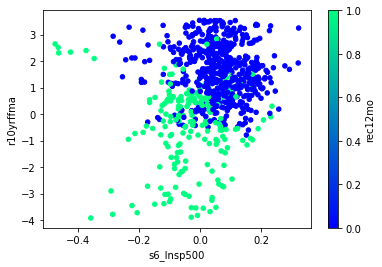

In [18]:
# Scatter plot of SP500 vs Emp (during recessions and expansions)

fig, ax = plt.subplots()
sc = df2.plot.scatter(x='s6_lnsp500', y='r10yrffma', c='rec12mo', colormap='winter', ax=ax) # rainbow

In [8]:
# axes = pd.plotting.scatter_matrix(df2, alpha = 0.2, figsize = (9, 9), range_padding = 0.15)

In [9]:
from sklearn.model_selection import train_test_split

y = df2["rec12mo"]
X = df2[xlist]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.33

y_valid = df2_valid["rec12mo"]
X_valid = df2_valid[xlist]

y_oos = df2_oos["rec12mo"]
X_oos = df2_oos[xlist]

In [10]:
# Models: Logistic, Random Forest, SVC, Voting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft') # hard

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8289473684210527
RandomForestClassifier 0.9276315789473685
SVC 0.8289473684210527
VotingClassifier 0.8618421052631579


In [11]:
for name, score in zip(list(X_train), rnd_clf.feature_importances_):
    print(name,":", round(score,2))

r10yrffma : 0.48
s6_lnsp500 : 0.24
s6_lnemp : 0.27


In [12]:
# Model: Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.868421052631579


In [13]:
# Model: Bagging ensembles (of Decision Trees)

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=350, bootstrap=True, n_jobs=-1, random_state=42) # 100
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9144736842105263


In [14]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, # 2 200
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.9276315789473685


In [15]:
# Random forest parameters

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf2.fit(X_train, y_train)
y_pred = rnd_clf2.predict(X_test)
display(accuracy_score(y_test, y_pred))

0.9276315789473685

In [16]:
# Train/test/validate error

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, tree_clf, bag_clf, ada_clf, rnd_clf2):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_valid = clf.predict(X_valid)
    print(clf.__class__.__name__,"- train:", round(accuracy_score(y_train, y_pred_train),4), "- test:", round(accuracy_score(y_test, y_pred_test),4), "- validate:", round(accuracy_score(y_valid, y_pred_valid),4))

LogisticRegression - train: 0.8468 - test: 0.8289 - validate: 0.6923
RandomForestClassifier - train: 1.0 - test: 0.9276 - validate: 0.4615
SVC - train: 0.8402 - test: 0.8289 - validate: 0.4615
VotingClassifier - train: 0.9061 - test: 0.8618 - validate: 0.6154
DecisionTreeClassifier - train: 1.0 - test: 0.8684 - validate: 0.5385
BaggingClassifier - train: 0.9868 - test: 0.9145 - validate: 0.5769
AdaBoostClassifier - train: 1.0 - test: 0.9276 - validate: 0.4615
RandomForestClassifier - train: 0.9835 - test: 0.9276 - validate: 0.4615


In [115]:
# Predictions on random set of test data

pred_test = log_clf.predict_proba(X_test)
dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values)
xb_test = pd.concat([y_test,X_test,dfpred_test], axis=1)
xb_test #.tail()

,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,0,1
413,0.0,1.86,0.085794,0.014553,0.941679,0.058321
535,0.0,0.66,0.119589,0.013607,0.789263,0.210737
117,0.0,1.00,0.132785,0.006597,0.861440,0.138560
531,0.0,1.13,0.188638,0.014308,0.905108,0.094892
129,0.0,0.63,0.101516,0.012128,0.768385,0.231615
...,...,...,...,...,...,...
567,1.0,0.07,0.032715,0.009262,0.535589,0.464411
358,0.0,1.69,0.291778,-0.005003,0.968945,0.031055
326,1.0,-2.64,0.060919,-0.006317,0.032837,0.967163
301,0.0,1.19,0.032660,0.027374,0.840583,0.159417


In [116]:
# Predictions on validation data

pred_valid = log_clf.predict_proba(X_valid)
dfpred_valid = pd.DataFrame(pred_valid, index = df2_valid.index.values)
xb_valid = pd.concat([df2_valid,dfpred_valid], axis=1)
xb_valid

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,0,1
779,3/1/2018,0.0,1.24,0.080855,0.008677,0.872434,0.127566
780,4/1/2018,0.0,1.24,0.037094,0.008661,0.849417,0.150583
781,5/1/2018,0.0,1.25,0.040753,0.009320,0.853237,0.146763
782,6/1/2018,0.0,1.25,0.033225,0.009761,0.849097,0.150903
783,7/1/2018,0.0,1.22,0.001375,0.009141,0.824407,0.175593
784,8/1/2018,0.0,1.14,0.054898,0.008206,0.842088,0.157912
785,9/1/2018,0.0,1.09,0.070951,0.007264,0.842440,0.157560
786,10/1/2018,0.0,1.06,0.048485,0.007377,0.823102,0.176898
787,11/1/2018,0.0,1.00,0.008015,0.005811,0.781996,0.218004
788,12/1/2018,0.0,0.91,-0.070323,0.005596,0.692460,0.307540


In [117]:
# Predictions on out-of-sample data

pred_oos = log_clf.predict_proba(X_oos)
dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)
xb_oos = pd.concat([df2_oos,dfpred_oos], axis=1)
xb_oos.tail(18)

,period,rec12mo,r10yrffma,s6_lnsp500,s6_lnemp,0,1
835,11/1/2022,NaN,0.95,-0.030883,0.014552,0.740392,0.259608
836,12/1/2022,NaN,0.55,0.003440,0.012673,0.659446,0.340554
837,1/1/2023,NaN,0.21,0.012430,0.011273,0.560473,0.439527
838,2/1/2023,NaN,-0.02,-0.019150,0.011539,0.449168,0.550832
839,3/1/2023,NaN,-0.35,0.030195,0.010818,0.394112,0.605888
840,4/1/2023,NaN,-0.73,0.100860,0.010259,0.347711,0.652289
841,5/1/2023,NaN,-0.99,0.056735,0.010531,0.236553,0.763447
842,6/1/2023,NaN,-1.13,0.104965,0.011189,0.241141,0.758859
843,7/1/2023,NaN,-1.20,0.129461,0.009248,0.243339,0.756661
844,8/1/2023,NaN,-1.26,0.088537,0.008739,0.198523,0.801477


In [ ]:
# get plot to accept more than two X vars in classifier (but still only charting 2)
# x add more vars to classifier
# x see if way to play with svm parameters? higher dimensions?
# x play with random forest/bagging parameters? (see other notebook)
# x change from rec to rec12mo?
# x predict values for full df (look at months leading up to covid rec)
# x any other features? IP, more interest rates, 3/6/9/12mo growth rates?

# more growth rates (3 and 9) and do interest rate spreads instead of levels (maybe keep rff level too...)
# x calc training/test/(valid?) errors
# x should i keep the 2020 recession as out of sample too? just the rec12mo period, or also the expansion before?

# look at diff ensemble regressions to use (see other notebook and google results)
# sqrt rectime?